<a href="https://colab.research.google.com/github/YoheiMurata/moomoo-lab.keras/blob/master/learn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ディープラーニング事始め：MNISTを学習させてみよう
初めてKeras + TensorFlowでディープラーニングをするにあたり、まずはMNISTを学習させて、手書き数字の識別をさせてみましょう。

In [0]:
# 必要なライブラリをインポート
import keras
# Kerasで標準に用意されているMNISTのライブラリを利用
from keras.datasets import mnist
#　各レイヤーなどのインポート
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense, Activation, Dropout, Flatten
from time import gmtime, strftime
from keras.utils import np_utils
#  グラフ表示のためのライブラリ
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

#MNISTのデータセットを取得
mnist.load_data（）でMNISTのデータセットをダウンロードし、各変数（x_train, y_train), (x_test, y_test)に代入します。

各変数はそれぞれx_train, y_trainはテスト用の画像およびラベル情報、x_test, y_testは検証用データになります

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

取得したデータセットの画像の形式は（データ数、縦のピクセル数、横のピクセル数）となっており、チャネル数が存在しない。

学習の際にはチャネル数が必要なので、末尾に１次元追加して（データ数、縦のピクセル、横のピクセル、チャネル数＝１）とします。
（MNISTは白黒画像なので、チャネル数=1となります）



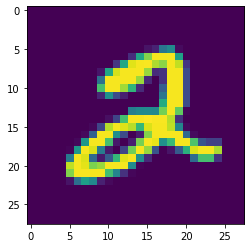

In [30]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
#  試しに５番目の画像を出力してみます
plt.imshow(np.asarray(x_train[5].reshape(28, 28)))

# ラベル情報の編集
MNISTのラベル情報を、one-hot表現というものに加工します。

one-hot表現とは、あるベクトルの中で該当する値だけが1で、そのほかは０となっているような表現です。
例えば、画像x_trainは０〜９の10種類の画像があり、x_train[5]は「２」の画像です、それに対応したラベル情報y_train[5]をone-hot表現にすると[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]となります。

In [31]:
# ラベル情報を長さ１０のone-hot表現に変換します
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# 「２」の画像に対するラベル情報を試しに出力してみる
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 画像データの正規化
画像内の各ピクセルの値は、０〜２５５となっています。
このままだと値が大きすぎるため、学習をする際に精度が落ちる可能性があります。

そのため、各画像のピクセルの値が０〜１となるように正規化します。



In [0]:
x_train.astype('float32')
x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

# ニューラルネットワークの定義
MNISTの学習のための簡単なニューラルネットワークを定義します。

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

adam = Adam( lr = 1e-4 )

model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

# 学習の開始
実際にfitメソッドで学習を開始します。
batch_sizeは1度の学習で使う画像の数、
epochsはbatch_size枚の画像を利用した学習を１セットとした時の学習セット数です。

In [35]:
learn_history = model.fit( x_train, y_train, batch_size = 300, epochs = 100, verbose = 1, validation_split = 0.1)
eval_history = model.evaluate( x_test, y_test, batch_size = 300, verbose = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 5s 85us/step - loss: 0.9245 - acc: 0.7195 - val_loss: 0.2270 - val_acc: 0.9368
Epoch 2/100
54000/54000 [==============================] - 4s 77us/step - loss: 0.3163 - acc: 0.9051 - val_loss: 0.1492 - val_acc: 0.9582
Epoch 3/100
54000/54000 [==============================] - 4s 76us/step - loss: 0.2214 - acc: 0.9346 - val_loss: 0.1076 - val_acc: 0.9698
Epoch 4/100
54000/54000 [==============================] - 4s 77us/step - loss: 0.1678 - acc: 0.9503 - val_loss: 0.0883 - val_acc: 0.9753
Epoch 5/100
54000/54000 [==============================] - 4s 77us/step - loss: 0.1310 - acc: 0.9614 - val_loss: 0.0729 - val_acc: 0.9793
Epoch 6/100
54000/54000 [==============================] - 4s 77us/step - loss: 0.1110 - acc: 0.9672 - val_loss: 0.0648 - val_acc: 0.9832
Epoch 7/100
54000/54000 [==============================] - 4s 76us/step - loss: 0.0974 - acc: 0.9709 - val_loss: 0.0577 - v

# 学習したモデルを保存する
学習したモデルは、Google Driveと連携して簡単に保存することができる。
以下はその例

In [36]:
# 保存先のディレクトリを指定。drive/My Driveまでは必須で、それ以降は任意
SAVE_PATH = 'drive/My Drive/mnist/mnist_model.hdf5'

from google.colab import drive
drive.mount('drive')
model.save(SAVE_PATH)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


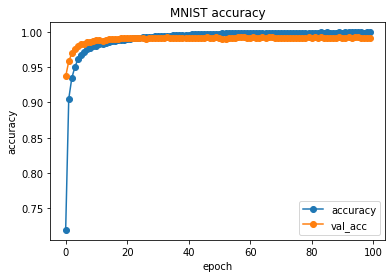

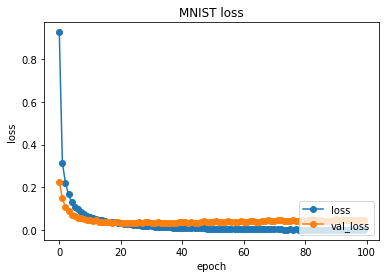

In [37]:
#!mv mnist_model_weight.hdf5 'tensorboard/My Drive/tensorboard/'
#model.save_weights('mnist_model_weight.hdf5')

# 精度の履歴をプロット
plt.plot(learn_history.history['acc'],"o-",label="accuracy")
plt.plot(learn_history.history['val_acc'],"o-",label="val_acc")
plt.title('MNIST accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.show()

# 損失の履歴をプロット
plt.plot(learn_history.history['loss'],"o-",label="loss",)
plt.plot(learn_history.history['val_loss'],"o-",label="val_loss")
plt.title('MNIST loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

# 保存したモデルを利用した手書き数字の推測をやらせてみる
保存したモデルを利用して、今度は自分で書いた手書き数字の推定をしてみましょう


In [38]:
# モデルの読み込み
model2 = keras.models.load_model(SAVE_PATH)
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

# 手書き数字画像を作ってアップロード
ここで、手書き数字の画像をアップロードできます

In [39]:
from google.colab import files
uploaded = files.upload()

Saving 3.png to 3 (1).png


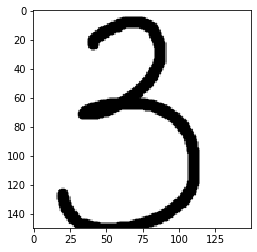

In [40]:
from PIL import Image
import numpy as np
# 例として、手書き数字「３」を書いてアップロードした「3.png」を読み込ませます
im = Image.open('3.png')  # ここはアップロードした画像ファイルの名前に書き換えてください
plt.imshow(np.array(im))


以下で、ニューラルネットワークの推測ができるように画像を加工します

具体的には、28x28にリサイズし、グレースケールにした後で、各ピクセルの値を0~1となるように正規化をしています。

(1, 28, 28, 1)

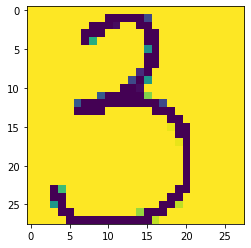

In [41]:
im_resize = im.resize((28, 28))
im_resize  = im_resize.convert('L')

plt.imshow(np.array(im_resize))
input_data = np.array(im_resize)
input_data = input_data.reshape(1, 28, 28, 1)
input_data.astype('float32')
input_data = input_data / 255

input_data.shape

アップロードした画像をpredictメソッドで推測をします。

推測をした結果として得られる戻り値は、長さ10の配列です。
配列のそれぞれの値は、推測した結果として0~9の数字である可能性を表しています。
つまり、推測の結果として得られる配列は


[0の可能性, 1の可能性, ... 9の可能性]


となります。

なので、一番値が大きい添字が推測結果となります。一番大きい添字はnumpy.argmaxで導き出します。

In [56]:
answer = model2.predict(input_data)
# 推測結果を割り出す
answer_num = np.argmax(answer)

print('推測結果: {}, 精度: {}'.format(answer_num, np.max(answer) * 100))

推測結果: 3, 精度: 0.999771773815155
